In [37]:
import tensorly as tl
from time import time
from tensorly.decomposition import parafac
from tensorly.random import check_random_state
import numpy as np
from tqdm import tqdm

tol = np.logspace(-3, -9)
err = np.empty_like(tol)
err_ls = np.empty_like(tol)
tt = np.empty_like(tol)
tt_ls = np.empty_like(tol)
rng = check_random_state(1234)
tensor = tl.tensor(rng.random_sample((100, 20, 20)))

fac = parafac(tensor, rank=7, n_iter_max=2000000, tol=1.0e-12, orthogonalise=True, linesearch=True)
err_min = tl.norm(tl.kruskal_to_tensor(fac) - tensor)

for ii, toll in tqdm(enumerate(tol), total=len(tol)):
    start = time()
    fac = parafac(tensor, rank=7, n_iter_max=2000000, tol=toll, orthogonalise=True)
    tt[ii] = time() - start
    start = time()
    fac_ls = parafac(tensor, rank=7, n_iter_max=2000000, tol=toll, orthogonalise=True, linesearch=True)
    tt_ls[ii] = time() - start
    
    err[ii] = tl.norm(tl.kruskal_to_tensor(fac) - tensor)
    err_ls[ii] = tl.norm(tl.kruskal_to_tensor(fac_ls) - tensor)


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


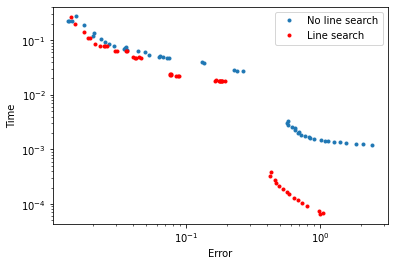

In [38]:
import matplotlib.pyplot as plt

plt.loglog(tt, err - err_min, '.', label="No line search");
plt.loglog(tt_ls, err_ls - err_min, '.r', label="Line search");
plt.ylabel("Time");
plt.xlabel("Error");
plt.legend();